
Image Segmentation Menu:
1. Simple Thresholding
2. Adaptive Mean Thresholding
3. Adaptive Gaussian Thresholding
4. Otsu's Thresholding
5. Region Growing (Flood Fill)
6. Watershed Segmentation
0. Exit
Enter your choice (0 to exit): 1


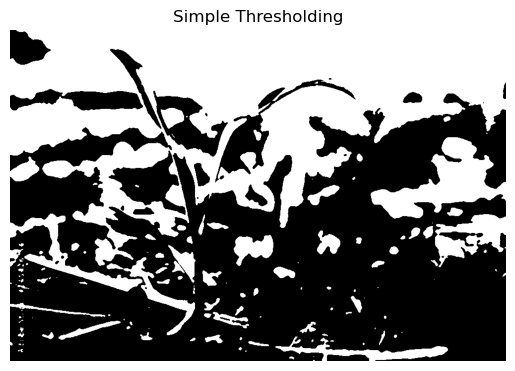


Image Segmentation Menu:
1. Simple Thresholding
2. Adaptive Mean Thresholding
3. Adaptive Gaussian Thresholding
4. Otsu's Thresholding
5. Region Growing (Flood Fill)
6. Watershed Segmentation
0. Exit
Enter your choice (0 to exit): 2


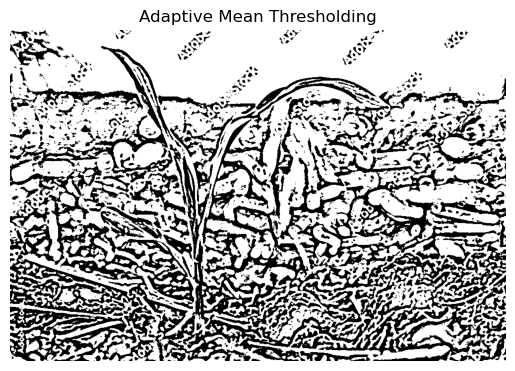


Image Segmentation Menu:
1. Simple Thresholding
2. Adaptive Mean Thresholding
3. Adaptive Gaussian Thresholding
4. Otsu's Thresholding
5. Region Growing (Flood Fill)
6. Watershed Segmentation
0. Exit
Enter your choice (0 to exit): 3


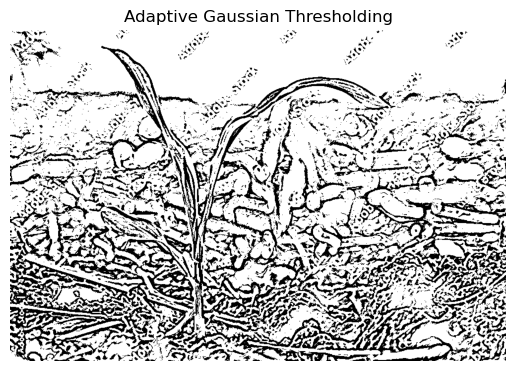


Image Segmentation Menu:
1. Simple Thresholding
2. Adaptive Mean Thresholding
3. Adaptive Gaussian Thresholding
4. Otsu's Thresholding
5. Region Growing (Flood Fill)
6. Watershed Segmentation
0. Exit
Enter your choice (0 to exit): 4


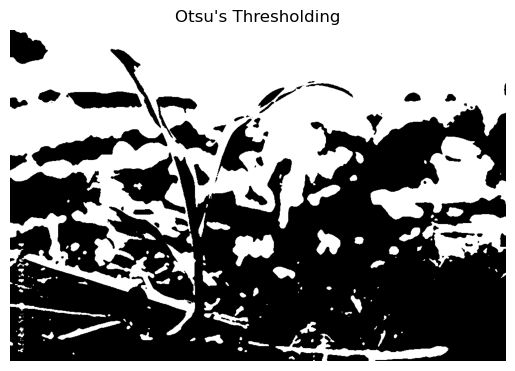


Image Segmentation Menu:
1. Simple Thresholding
2. Adaptive Mean Thresholding
3. Adaptive Gaussian Thresholding
4. Otsu's Thresholding
5. Region Growing (Flood Fill)
6. Watershed Segmentation
0. Exit
Enter your choice (0 to exit): 5
Enter seed point X-coordinate: 100
Enter seed point Y-coordinate: 100
Enter lower difference threshold: 10
Enter upper difference threshold: 10


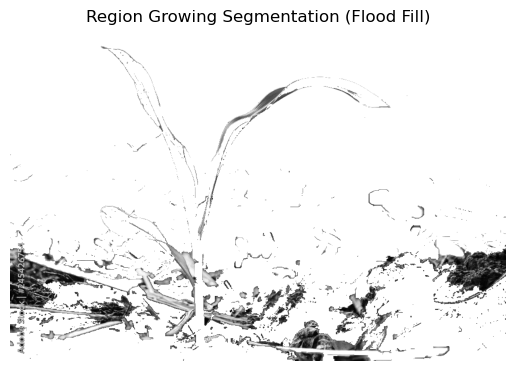


Image Segmentation Menu:
1. Simple Thresholding
2. Adaptive Mean Thresholding
3. Adaptive Gaussian Thresholding
4. Otsu's Thresholding
5. Region Growing (Flood Fill)
6. Watershed Segmentation
0. Exit
Enter your choice (0 to exit): 6


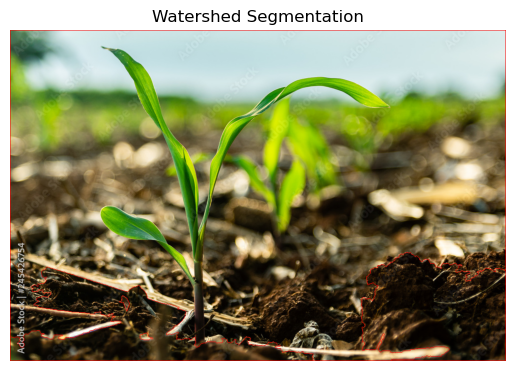


Image Segmentation Menu:
1. Simple Thresholding
2. Adaptive Mean Thresholding
3. Adaptive Gaussian Thresholding
4. Otsu's Thresholding
5. Region Growing (Flood Fill)
6. Watershed Segmentation
0. Exit
Enter your choice (0 to exit): 0
Exiting the program.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

class ImageSegmentation:
    def __init__(self, image_path):
        self.image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        self.color_image = cv2.imread(image_path)  # For Watershed
        self.img_blurred = cv2.medianBlur(self.image, 5)

    def simple_threshold(self, threshold_value=127):
        _, thresh_binary = cv2.threshold(self.img_blurred, threshold_value, 255, cv2.THRESH_BINARY)
        plt.imshow(thresh_binary, cmap='gray')
        plt.title('Simple Thresholding')
        plt.axis('off')
        plt.show()

    def adaptive_mean_threshold(self):
        th_mean = cv2.adaptiveThreshold(self.img_blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
        plt.imshow(th_mean, cmap='gray')
        plt.title('Adaptive Mean Thresholding')
        plt.axis('off')
        plt.show()

    def adaptive_gaussian_threshold(self):
        th_gaussian = cv2.adaptiveThreshold(self.img_blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
        plt.imshow(th_gaussian, cmap='gray')
        plt.title('Adaptive Gaussian Thresholding')
        plt.axis('off')
        plt.show()

    def otsu_threshold(self):
        _, th_otsu = cv2.threshold(self.img_blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        plt.imshow(th_otsu, cmap='gray')
        plt.title("Otsu's Thresholding")
        plt.axis('off')
        plt.show()

    def region_growing_floodfill(self, seed, lo_diff=10, up_diff=10):
        flood_filled_image = self.image.copy()
        mask = np.zeros((self.image.shape[0] + 2, self.image.shape[1] + 2), np.uint8)
        cv2.floodFill(flood_filled_image, mask, seedPoint=seed, newVal=255, loDiff=(lo_diff,), upDiff=(up_diff,))
        plt.imshow(flood_filled_image, cmap='gray')
        plt.title('Region Growing Segmentation (Flood Fill)')
        plt.axis('off')
        plt.show()

    def watershed_segmentation(self):
        gray = cv2.cvtColor(self.color_image, cv2.COLOR_BGR2GRAY)
        _, bin_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
        bin_img = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN, kernel, iterations=2)

        sure_bg = cv2.dilate(bin_img, kernel, iterations=3)
        dist = cv2.distanceTransform(bin_img, cv2.DIST_L2, 5)
        _, sure_fg = cv2.threshold(dist, 0.5 * dist.max(), 255, cv2.THRESH_BINARY)
        sure_fg = np.uint8(sure_fg)
    
        unknown = cv2.subtract(sure_bg, sure_fg)
        
        _, markers = cv2.connectedComponents(sure_fg)
        markers += 1
        markers[unknown == 255] = 0
        
        markers = cv2.watershed(self.color_image, markers)
        self.color_image[markers == -1] = [0, 0, 255]  

        plt.imshow(cv2.cvtColor(self.color_image, cv2.COLOR_BGR2RGB))
        plt.title('Watershed Segmentation')
        plt.axis('off')
        plt.show()

def main_menu():
    print("\nImage Segmentation Menu:")
    print("1. Simple Thresholding")
    print("2. Adaptive Mean Thresholding")
    print("3. Adaptive Gaussian Thresholding")
    print("4. Otsu's Thresholding")
    print("5. Region Growing (Flood Fill)")
    print("6. Watershed Segmentation")
    print("0. Exit")

if __name__ == "__main__":

    segmenter = ImageSegmentation('imgg1.jpg')

    while True:
        main_menu()
        choice = input("Enter your choice (0 to exit): ")

        if choice == '1':
            segmenter.simple_threshold()
        elif choice == '2':
            segmenter.adaptive_mean_threshold()
        elif choice == '3':
            segmenter.adaptive_gaussian_threshold()
        elif choice == '4':
            segmenter.otsu_threshold()
        elif choice == '5':
            x = int(input("Enter seed point X-coordinate: "))
            y = int(input("Enter seed point Y-coordinate: "))
            lo_diff = int(input("Enter lower difference threshold: "))
            up_diff = int(input("Enter upper difference threshold: "))
            segmenter.region_growing_floodfill(seed=(x, y), lo_diff=lo_diff, up_diff=up_diff)
        elif choice == '6':
            segmenter.watershed_segmentation()
        elif choice == '0':
            print("Exiting the program.")
            break
        else:
            print("Invalid choice. Please try again.")


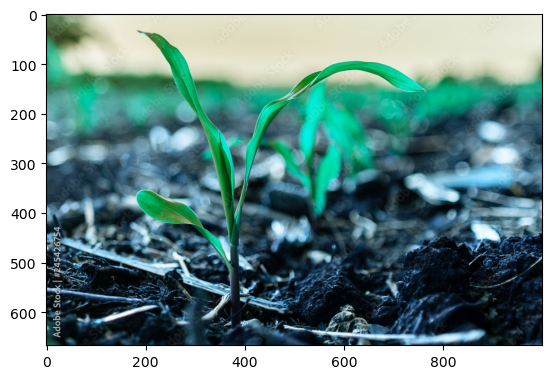

In [4]:
import cv2
img= cv2.imread("imgg1.jpg")
plt.imshow(img)
